will explore the relationship between your radio promotion budget and your sales.

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
file_path = "../data/raw/marketing_sales_data.csv"
data = pd.read_csv(file_path)

In [4]:
# Display the first 10 rows of the data.
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [5]:
# Display number of rows, number of columns.
data.shape

(572, 5)

In [6]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [7]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
data.any(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
567    True
568    True
569    True
570    True
571    True
Length: 572, dtype: bool

In [8]:
# Use .sum() to get the number of rows that contain missing values.
print(data.isna().sum())


TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64


In [9]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.
data = data.dropna()

In [10]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values

missing_mask = data.isna()
rows_with_missing = missing_mask.any(axis=1)
num_missing_rows = rows_with_missing.sum()

print(f"Number of rows with missing values: {num_missing_rows}")

Number of rows with missing values: 0


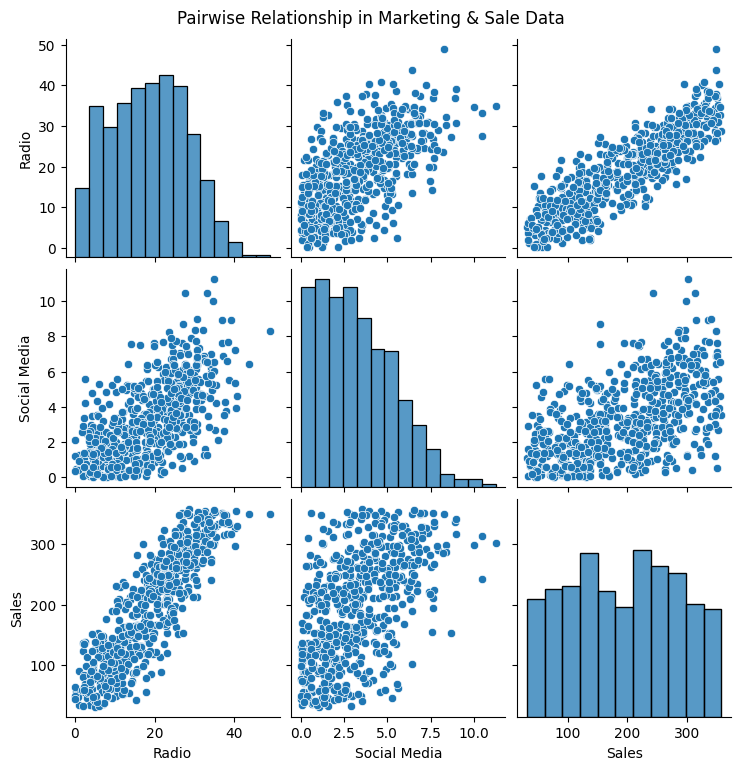

In [11]:
sns.pairplot(data)
plt.suptitle('Pairwise Relationship in Marketing & Sale Data', y=1.02)
plt.show()

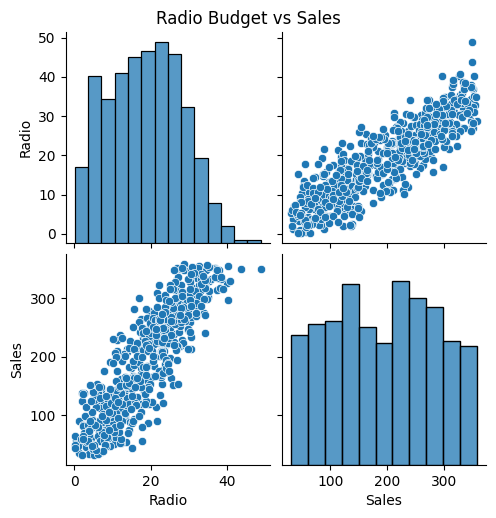

In [12]:
# only for radio and sales
sns.pairplot(data[['Radio', 'Sales']])
plt.suptitle('Radio Budget vs Sales', y=1.02)
plt.show()

In [13]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

### YOUR CODE HERE ###
regression_data = data[['Radio', 'Sales']]


In [14]:
# Write the linear regression formula.
# Save it in a variable.

### YOUR CODE HERE ###
# Linear regression formula for the model
regression_formula = "Sales ~ Radio"

# Print to confirm
print(regression_formula)


Sales ~ Radio


In [15]:
# Implement OLS.
import statsmodels.formula.api as smf
ols_model = smf.ols(formula=regression_formula, data=regression_data).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          2.07e-176
Time:                        21:15:49   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.0

In [16]:
# Fit the model to the data.
# Save the fitted model in a variable.
# Fit the linear regression model
fitted_model = smf.ols(formula="Sales ~ Radio", data=regression_data).fit()

# Print the summary (optional)
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          2.07e-176
Time:                        21:15:49   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.0

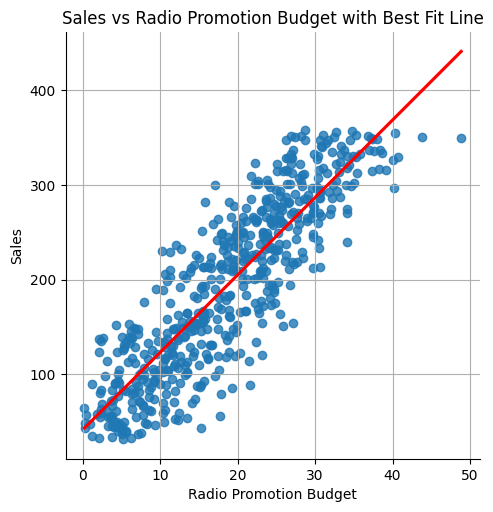

In [17]:
# Plot the OLS data with the best fit regression line.
sns.lmplot(x="Radio", y="Sales", data=regression_data, ci=None, line_kws={"color": "red"})
plt.title("Sales vs Radio Promotion Budget with Best Fit Line")
plt.xlabel("Radio Promotion Budget")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [19]:
residuals = fitted_model.resid
residuals.head(10)

0    38.563673
1    59.020221
2   -23.574057
3    70.365959
4     8.874344
5    11.509532
6     3.761307
7    -8.900469
8   -18.217017
9   -16.698521
dtype: float64

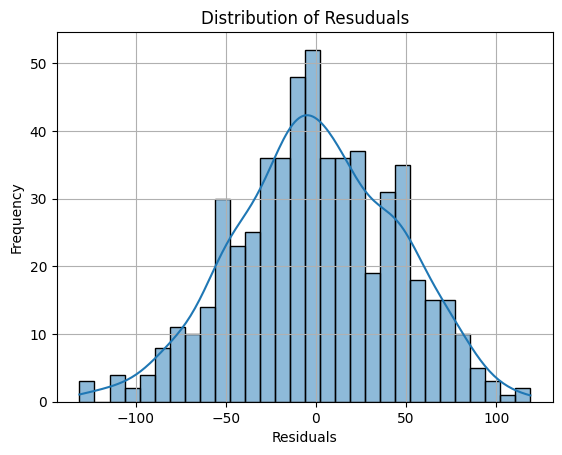

In [20]:
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Resuduals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

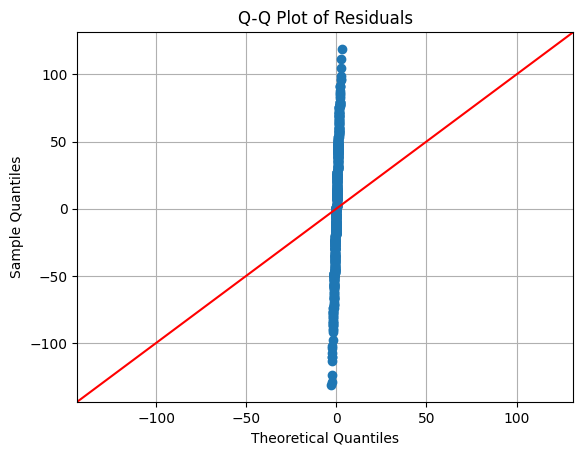

In [21]:
# Create a Q-Q plot.
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

In [26]:
fitted_values = fitted_model.fittedvalues
#fitted_values = fitted_model.predict(regression_data[['Radio']])

# Display the first few
print(fitted_values.head())

0     51.490549
1    163.721447
2    126.348847
3    257.873419
4    342.932984
dtype: float64


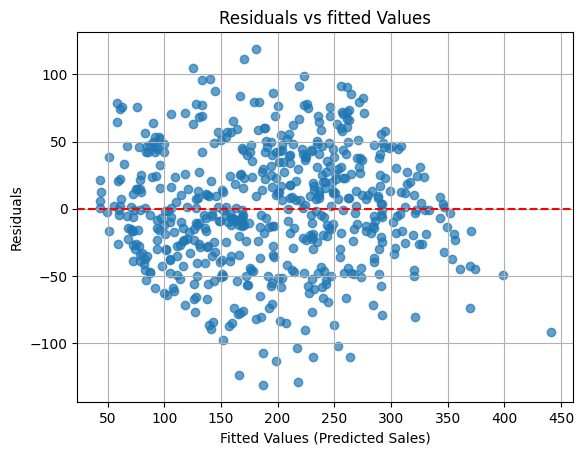

In [27]:
# Create a scatterplot of residuals against fitted values.

plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0,color='red', linestyle='--')
plt.title("Residuals vs fitted Values")
plt.xlabel("Fitted Values (Predicted Sales)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()
